# Exploratory Data Analysis

## Library imports

In [1]:
import os
import gc
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

cwd = os.getcwd()
parent = cwd.replace('/notebooks', '')
sys.path.insert(0, parent) 

from scripts.utils import DataLoader, Plotters, Analysis, CleanDataFrame

In [2]:
analyzer = Analysis()
cleaner = CleanDataFrame()
plotter = Plotters(w=8, h=5)

## Load the data

In [3]:
tellco_df = DataLoader("../data", "Week1_challenge_data_source.csv").read_csv()
shape = tellco_df.shape
display(tellco_df.head())
print(f"Our data has {shape[0]} rows and {shape[1]} columns")

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


Our data has 150001 rows and 55 columns


In [4]:
# tellco_df.info()

## Datatype conversion

There are some columns that have the wrong data types. The `Start` and `End` columns should be datattime type, the `IMSI`, `MSISDN/Number`, `IMEI`, and `Bearer Id` should all be strings instead of numbers. 
This is because they are not measures of some feature. They are mostly Identifiers.  

In [5]:
# tellco_df = cleaner.fix_datatypes(tellco_df)

In [6]:
len(tellco_df.columns)


55

There are also two duration columns with similar names. `Dur. (ms).1` is the duration in seconds. We can get rid of it and keep the more granular column `Dur. (ms)` Which is the duration in milli seconds. And I will also rename the column to `Dur. ms`.

In [7]:
tellco_df = cleaner.rename_columns(tellco_df)
tellco_df.drop(columns='Dur. s', inplace=True)

len(tellco_df.columns)


54

## Missing Values Analysis

In [8]:
cleaner.percent_missing(tellco_df)

The dataset contains 12.73 % missing values.


We can get more specific data about which columns have missing entries.

In [9]:
cols_missing_val_count, cols_missing_val = analyzer.get_missing_entries_count(tellco_df)
cols_missing_val_count

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)                             754
UL TP < 10 Kbps (%)            

In [10]:
len(cols_missing_val)

40

## The following are the steps I take to deal with the missing values and the justifications for them.
1. The `Bearer Id` is a string that ids a session. If I use replace it with the most frequent session id, it would create an outlier that would have >900 entries while the rest are not repeated more than 17 times. So, I will just drop the rows missing values for `Bearer Id` 

In [11]:
tellco_df = cleaner.remove_null_row(tellco_df, ['Bearer Id'])
print(f'This reduces our row count to {tellco_df.shape[0]}')

This reduces our row count to 149010


Let's take a look at how our data is affected by step one.

In [12]:
cols_missing_val_count, cols_missing_val = analyzer.get_missing_entries_count(tellco_df)
cols_missing_val_count

IMSI                                             9
MSISDN/Number                                  504
IMEI                                            11
Last Location Name                             162
Avg RTT DL (ms)                              27685
Avg RTT UL (ms)                              27666
TCP DL Retrans. Vol (Bytes)                  87906
TCP UL Retrans. Vol (Bytes)                  96368
DL TP < 50 Kbps (%)                            716
50 Kbps < DL TP < 250 Kbps (%)                 716
250 Kbps < DL TP < 1 Mbps (%)                  716
DL TP > 1 Mbps (%)                             716
UL TP < 10 Kbps (%)                            770
10 Kbps < UL TP < 50 Kbps (%)                  770
50 Kbps < UL TP < 300 Kbps (%)                 770
UL TP > 300 Kbps (%)                           770
HTTP DL (Bytes)                              81228
HTTP UL (Bytes)                              81578
Handset Manufacturer                            11
Handset Type                   

2. Separate numerical and catergorical columns

In [13]:
numericals_columns = cleaner.get_numerical_columns(tellco_df)
categorical_columns = cleaner.get_categorical_columns(tellco_df)
missing_numericals = [col for col in numericals_columns if col in cols_missing_val]
missing_categorical = [col for col in categorical_columns if col in cols_missing_val]
print(f"Categorical:\n{missing_categorical}\nNumerical:\n{missing_numericals}")

Categorical:
['Last Location Name', 'Handset Manufacturer', 'Handset Type']
Numerical:
['IMSI', 'MSISDN/Number', 'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B']


### Dealing with categorical values

In [14]:
for col in missing_categorical:
    print(tellco_df[col].isna().sum())
    print(f'{col} has {tellco_df[col].unique().shape[0]} unique entries')
    most_freq_count = tellco_df[col].value_counts().values[0]
    print(f'{col}\'s most frequent entry has {most_freq_count} entries. \
            If we use mode the count will be {most_freq_count + cols_missing_val_count[col]}')


162
Last Location Name has 45548 unique entries
Last Location Name's most frequent entry has 80 entries.             If we use mode the count will be 242
11
Handset Manufacturer has 171 unique entries
Handset Manufacturer's most frequent entry has 59440 entries.             If we use mode the count will be 59451
11
Handset Type has 1394 unique entries
Handset Type's most frequent entry has 19752 entries.             If we use mode the count will be 19763


We will replace them with the most frequent entry

In [15]:
tellco_df = cleaner.replace_missing(df=tellco_df, columns=missing_categorical, method='mode')

In [16]:
cols_missing_val_count, cols_missing_val = analyzer.get_missing_entries_count(tellco_df)
cols_missing_val_count

IMSI                                             9
MSISDN/Number                                  504
IMEI                                            11
Avg RTT DL (ms)                              27685
Avg RTT UL (ms)                              27666
TCP DL Retrans. Vol (Bytes)                  87906
TCP UL Retrans. Vol (Bytes)                  96368
DL TP < 50 Kbps (%)                            716
50 Kbps < DL TP < 250 Kbps (%)                 716
250 Kbps < DL TP < 1 Mbps (%)                  716
DL TP > 1 Mbps (%)                             716
UL TP < 10 Kbps (%)                            770
10 Kbps < UL TP < 50 Kbps (%)                  770
50 Kbps < UL TP < 300 Kbps (%)                 770
UL TP > 300 Kbps (%)                           770
HTTP DL (Bytes)                              81228
HTTP UL (Bytes)                              81578
Nb of sec with 125000B < Vol DL              97000
Nb of sec with 1250B < Vol UL < 6250B        92448
Nb of sec with 31250B < Vol DL 

I will start treating `IMSI`, `IMEI`, and `MSISDN/Number` as strings. All three can be used to identify users. We could somehow use the `IMSI` and `IMEI` values to infer the `MSISDN/Number`. But since I am in a hurry, I will drop all 504 rows with missing `MSISDN/Number` entries.

**May the Gods Statistics forgive me!!!**

I will come back and fix this!!!!

In [17]:
identifiers = ['IMSI', 'IMEI', 'MSISDN/Number']
tellco_df = cleaner.remove_null_row(tellco_df, identifiers)
cols_missing_val_count, cols_missing_val = analyzer.get_missing_entries_count(tellco_df)
cols_missing_val_count

Avg RTT DL (ms)                              27636
Avg RTT UL (ms)                              27616
TCP DL Retrans. Vol (Bytes)                  87764
TCP UL Retrans. Vol (Bytes)                  96128
DL TP < 50 Kbps (%)                            712
50 Kbps < DL TP < 250 Kbps (%)                 712
250 Kbps < DL TP < 1 Mbps (%)                  712
DL TP > 1 Mbps (%)                             712
UL TP < 10 Kbps (%)                            767
10 Kbps < UL TP < 50 Kbps (%)                  767
50 Kbps < UL TP < 300 Kbps (%)                 767
UL TP > 300 Kbps (%)                           767
HTTP DL (Bytes)                              81129
HTTP UL (Bytes)                              81475
Nb of sec with 125000B < Vol DL              96775
Nb of sec with 1250B < Vol UL < 6250B        92269
Nb of sec with 31250B < Vol DL < 125000B     92978
Nb of sec with 37500B < Vol UL              128950
Nb of sec with 6250B < Vol DL < 31250B       87838
Nb of sec with 6250B < Vol UL <

### Dealing with numerical columns

In [18]:
numericals_columns = cleaner.get_numerical_columns(tellco_df)
categorical_columns = cleaner.get_categorical_columns(tellco_df)
missing_numericals = [col for col in numericals_columns if col in cols_missing_val]
missing_categorical = [col for col in categorical_columns if col in cols_missing_val]
print(f"Categorical:\n{missing_categorical}\nNumerical:\n{missing_numericals}")

Categorical:
[]
Numerical:
['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B']


To determie if we should use mean, median or anoter approach, let's first look at the distribution of our data.

In [19]:
num_missing_info = pd.DataFrame({
    'columns': cols_missing_val_count.index,
    'skew': tellco_df[missing_numericals].skew(axis=0).values,
    'missing_count': cols_missing_val_count.values
})
num_missing_info['min'] = tellco_df[num_missing_info['columns']].describe().transpose()[["min"]].values
num_missing_info['max'] = tellco_df[num_missing_info['columns']].describe().transpose()[["max"]].values
num_missing_info

,columns,skew,missing_count,min,max
0,Avg RTT DL (ms),66.662058,27636,0.0,9.692300e+04
1,Avg RTT UL (ms),28.622886,27616,0.0,7.120000e+03
2,TCP DL Retrans. Vol (Bytes),15.854993,87764,2.0,4.294426e+09
3,TCP UL Retrans. Vol (Bytes),83.348294,96128,1.0,2.908226e+09
4,DL TP < 50 Kbps (%),-2.301697,712,0.0,1.000000e+02
5,50 Kbps < DL TP < 250 Kbps (%),3.281417,712,0.0,9.300000e+01
6,250 Kbps < DL TP < 1 Mbps (%),4.576173,712,0.0,1.000000e+02
7,DL TP > 1 Mbps (%),5.358695,712,0.0,9.400000e+01
8,UL TP < 10 Kbps (%),-8.995678,767,0.0,1.000000e+02
9,10 Kbps < UL TP < 50 Kbps (%),10.959567,767,0.0,9.800000e+01


I found this [datascience.stackexchange answer](https://datascience.stackexchange.com/questions/67512/what-do-i-do-when-my-column-has-50-data-missing)

- For the columns with > 80000 missing entries I will use forward fill after confirming the first entry is not a null 
- For the others, I will use their median since they have considerable skew score.
- These two columns `['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']` are requested to be replaced with mean

In [20]:
replace_with_median = num_missing_info[num_missing_info['missing_count'] < 80000]['columns']
replace_with_mean = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)'] # B\c it is requested
replace_with_ffill = [col for col in missing_numericals \
    if col not in replace_with_mean and \
        col not in replace_with_median]
tellco_df = cleaner.replace_missing(tellco_df, replace_with_mean, 'mean')
tellco_df = cleaner.replace_missing(tellco_df, replace_with_median, 'median')
# tellco_df = tellco_df.ffill(tellco_df, replace_with_mean, 'mean')


In [21]:
cols_missing_val_count, cols_missing_val = analyzer.get_missing_entries_count(tellco_df)
display(tellco_df[cols_missing_val].head())
tellco_df[cols_missing_val].tail()


,HTTP DL (Bytes),HTTP UL (Bytes),Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,HTTP DL (Bytes),HTTP UL (Bytes),Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B
149995,16388988.0,2672663.0,1080.0,314.0,852.0,NaN,2068.0,8.0
149996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ooops!!! It looks like we can't user ffill and bfill.

In [22]:
tellco_df = cleaner.replace_missing(tellco_df, replace_with_ffill, 'median')

In [23]:
cols_missing_val_count, cols_missing_val = analyzer.get_missing_entries_count(tellco_df)
cols_missing_val

array([], dtype=object)

In [24]:
tellco_df = cleaner.fix_datatypes(tellco_df)

tellco_df.to_csv('../data/missing_cleaned.csv')

df_description = analyzer.get_univariate_analysis(tellco_df)
df_description

,count,mean,std,min,25%,50%,75%,max,mode,CoV,skew,kurtosis,iqr,missing_counts
Start ms,148506.0,4.992051e+02,2.885632e+02,0.0,2.500000e+02,4.990000e+02,7.490000e+02,9.990000e+02,3.410000e+02,0.578045,0.000563,-1.197224,4.990000e+02,0
End ms,148506.0,4.986402e+02,2.880701e+02,0.0,2.510000e+02,5.000000e+02,7.490000e+02,9.990000e+02,8.720000e+02,0.577711,-0.000781,-1.199094,4.980000e+02,0
Avg RTT DL (ms),148506.0,9.481103e+01,5.301700e+02,0.0,3.500000e+01,4.500000e+01,6.200000e+01,9.692300e+04,4.500000e+01,5.591860,73.731399,10166.826591,2.700000e+01,0
Avg RTT UL (ms),148506.0,1.527990e+01,7.662674e+01,0.0,3.000000e+00,5.000000e+00,1.100000e+01,7.120000e+03,5.000000e+00,5.014872,31.619786,1640.737025,8.000000e+00,0
Avg Bearer TP DL (kbps),148506.0,1.328752e+04,2.399348e+04,0.0,4.300000e+01,6.300000e+01,1.969950e+04,3.781600e+05,2.300000e+01,1.805715,2.589861,9.573447,1.965650e+04,0
Avg Bearer TP UL (kbps),148506.0,1.770598e+03,4.630306e+03,0.0,4.700000e+01,6.200000e+01,1.116000e+03,5.861300e+04,4.000000e+01,2.615108,4.499001,25.031825,1.069000e+03,0
TCP DL Retrans. Vol (Bytes),148506.0,2.100681e+07,1.171535e+08,2.0,1.410988e+06,2.100681e+07,2.100681e+07,4.294426e+09,2.100681e+07,5.576929,24.790608,694.897611,1.959582e+07,0
TCP UL Retrans. Vol (Bytes),148506.0,7.710518e+05,1.585490e+07,1.0,6.582400e+04,7.710518e+05,7.710518e+05,2.908226e+09,7.710518e+05,20.562686,140.341530,21697.579521,7.052278e+05,0
DL TP < 50 Kbps (%),148506.0,9.290416e+01,1.301168e+01,0.0,9.100000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,0.140055,-2.309370,5.671783,9.000000e+00,0
50 Kbps < DL TP < 250 Kbps (%),148506.0,3.037049e+00,6.191730e+00,0.0,0.000000e+00,0.000000e+00,4.000000e+00,9.300000e+01,0.000000e+00,2.038732,3.290110,16.065090,4.000000e+00,0


## All missing entries have been droped or imputed. 

Let's move on to outliers.

# Interquartile Range (IQR)

We can take the columns that have a coefficent of variance or `CoV` that is greater than one. Those will definately have some outliers.

In [25]:
col_with_outliers = df_description[df_description['CoV'] > 1].index.values
# col_with_outliers

Original data


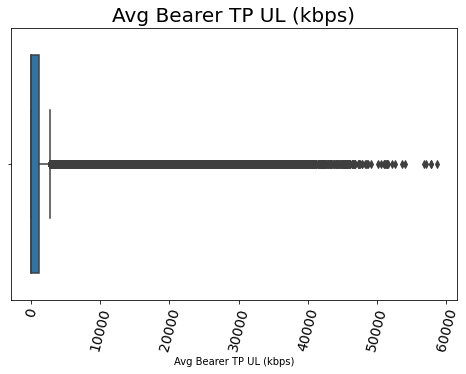

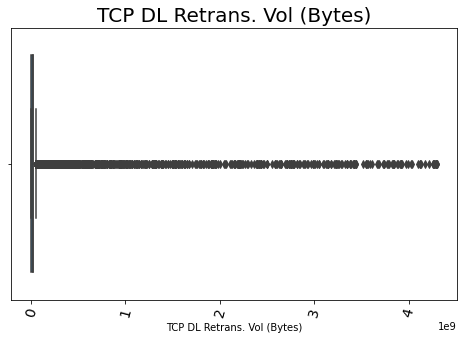

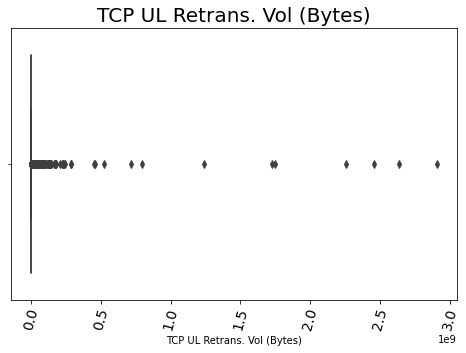

In [39]:
print("Original data")
for col in col_with_outliers[3:6]:
    plotter.plot_box(tellco_df, col, col)

I will use this [blog](https://www.pluralsight.com/guides/cleaning-up-data-from-outliers) as a guide for using `IQR`

In [40]:
# for col in col_with_outliers:
Q1 = tellco_df.quantile(0.25)
Q3 = tellco_df.quantile(0.75)
IQR = Q3 - Q1
col_with_outliers_df = tellco_df[col_with_outliers]
df_out = col_with_outliers_df[~((col_with_outliers_df < (Q1 - 1.5 * IQR)) |(col_with_outliers_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(77370, 24)


/tmp/ipykernel_60385/1644200170.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = col_with_outliers_df[~((col_with_outliers_df < (Q1 - 1.5 * IQR)) |(col_with_outliers_df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [41]:
# analyzer.get_univariate_analysis(df_out)

### Log Scalling

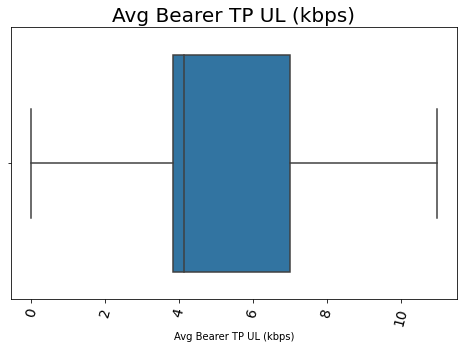

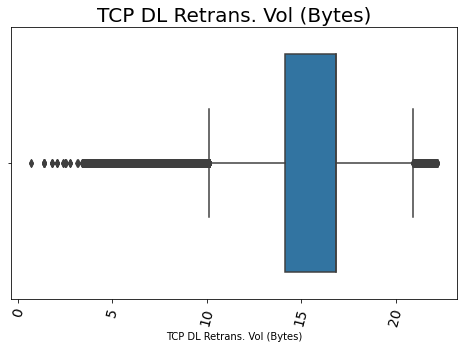

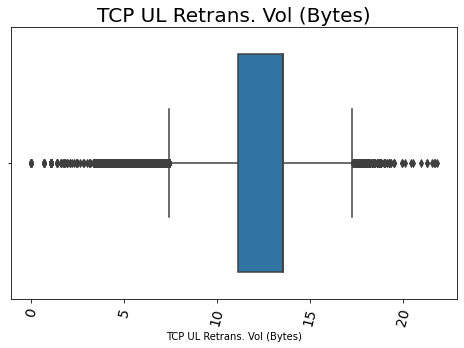

In [42]:
fixed = pd.DataFrame()
for col in col_with_outliers[3:6]:
    fixed[col] = tellco_df[col].map(lambda i: np.log(i) if i > 0 else 0)
    plotter.plot_box(fixed, col, col)


### See if the `Bearer Id` is unique for every row

In [43]:
tellco_df['Bearer Id'].unique().shape[0] == tellco_df.shape[0]

False

In [44]:
tellco_df[tellco_df['Bearer Id'].duplicated()]

,Bearer Id,Start,Start ms,End,End ms,IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
30,1.30424259559124e+19,2019-04-18 00:35:00,711.0,2019-04-25 04:52:00,691.0,208201008643031.0,33658752999.0,86540802106829.0,T29714B,273.0,...,1843883.0,15098966.0,12173853.0,10598373.0,366103099.0,13276512.0,195717525.0,14209340.0,55015623.0,386320481.0
50,1.30424259597083e+19,2019-04-20 02:55:00,691.0,2019-04-25 00:17:00,262.0,208201771747176.0,33763531539.0,86376903225730.0,D72939C,50.0,...,16006629.0,19493910.0,12084616.0,4858682.0,649474879.0,4900228.0,727173102.0,6679677.0,39034473.0,685149296.0
62,1.30424259597083e+19,2019-04-21 02:55:00,73.0,2019-04-25 00:17:00,262.0,208201771747176.0,33763531539.0,86376903225730.0,D72939C,52.0,...,22833724.0,10951633.0,18426843.0,8632677.0,576998244.0,9724918.0,446979790.0,14067203.0,46797611.0,632600264.0
72,7.27782565468596e+18,2019-04-21 13:57:00,724.0,2019-04-25 00:54:00,79.0,208209501606924.0,33669127720.0,35405309150628.0,T86956A,42.0,...,6740872.0,3322553.0,14288648.0,2003842.0,828682481.0,11918077.0,543039111.0,10996641.0,32244625.0,863513434.0
88,1.30424259605271e+19,2019-04-22 03:04:00,495.0,2019-04-25 04:02:00,116.0,208201401296320.0,33699429799.0,86376903425742.0,T70307A,52.0,...,1188023.0,4484350.0,16536627.0,19583438.0,493197062.0,7698465.0,778763935.0,14170970.0,49463345.0,517177788.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149978,1.31144835733667e+19,2019-04-29 07:28:00,28.0,2019-04-30 06:58:00,590.0,208201009757084.0,33669050475.0,86274204299919.0,D11280A,43.0,...,12580601.0,8448566.0,8736232.0,21024237.0,69494054.0,11207634.0,519383940.0,11451283.0,53109659.0,97762396.0
149979,1.30424259793288e+19,2019-04-29 07:28:00,139.0,2019-04-30 07:28:00,123.0,208201908226045.0,33761846164.0,86376903281944.0,D29782C,69.0,...,2124.0,9462493.0,13393869.0,8997147.0,113593806.0,9054034.0,391932815.0,304566.0,28557860.0,135635937.0
149987,1.31144835733669e+19,2019-04-29 07:28:00,251.0,2019-04-30 10:11:00,675.0,208201713533052.0,33664364225.0,35155409248549.0,T40618B,45.0,...,14318086.0,18430503.0,7131223.0,10294778.0,222252546.0,9667879.0,331976530.0,8632246.0,48514399.0,255377569.0
149994,1.31144835733672e+19,2019-04-29 07:28:00,83.0,2019-04-30 15:01:00,268.0,208200313074099.0,33645655643.0,35155409288696.0,T88383B,45.0,...,23043782.0,19176074.0,18762809.0,9591310.0,810666072.0,14858904.0,777865837.0,14693970.0,59377936.0,862796008.0


The above output tells us that there are 15292 rows with duplicated session ids but the rest of the columns for these are unique. so the rows are not duplicates. 